qui i prediction interval alla fine risultano leggermente diversi ma non credo sia un problema

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf


In [2]:
data_table_3 = {
    'Week': np.arange(1,41,1),
    'X': [
        3.29, 3.26, 3.30, 3.30, 3.23, 3.27, 3.23, 3.18, 3.22, 3.29,
        3.33, 3.32, 3.32, 3.38, 3.44, 3.38, 3.41, 3.46, 3.39, 3.42,
        3.46, 3.44, 3.47, 3.43, 3.41, 3.40, 3.42, 3.37, 3.66, 3.66,
        3.58, 3.60, 3.57, 3.57, 3.59, 3.56, 3.55, 3.60, 3.61, 3.66
    ]
}

# Create the DataFrame
data = pd.DataFrame(data_table_3)

data.head()

,Week,X
0,1,3.29
1,2,3.26
2,3,3.30
3,4,3.30
4,5,3.23


Number of points n = 40
Mean = 3.43


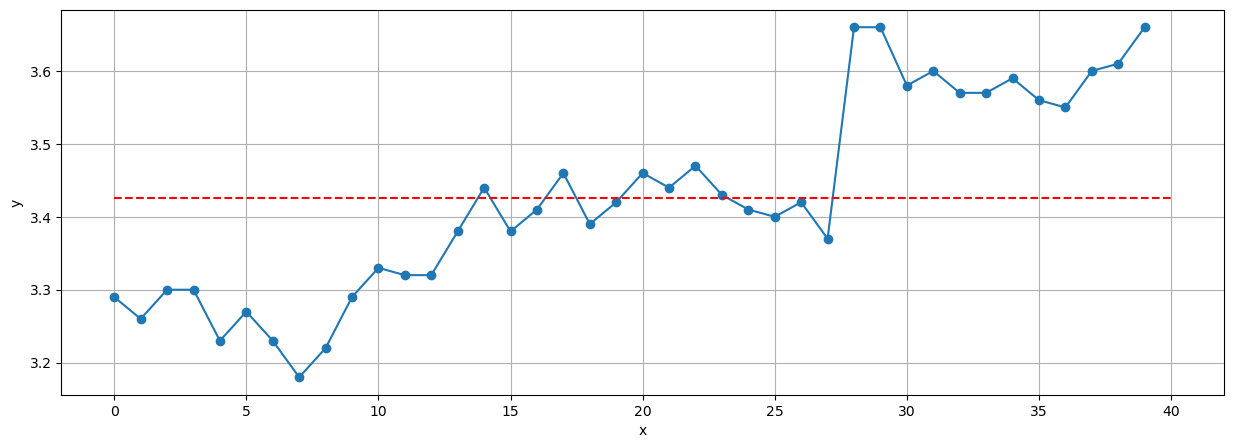

p-value of the Shapiro-Wilk test: 0.099


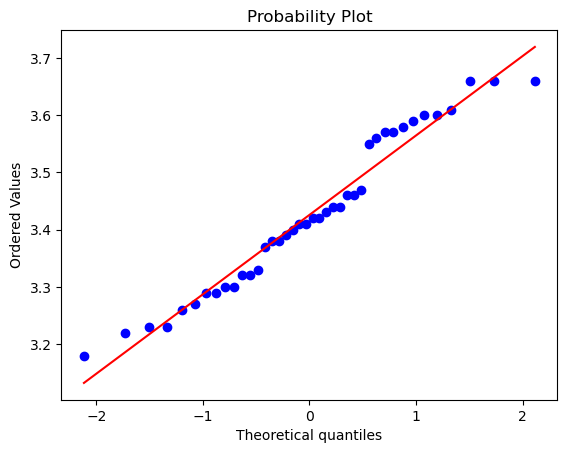

Accept H0: the data are normal
Runs test statistic = -4.143
Runs test p-value = 0.000
Reject H0: the data are not random


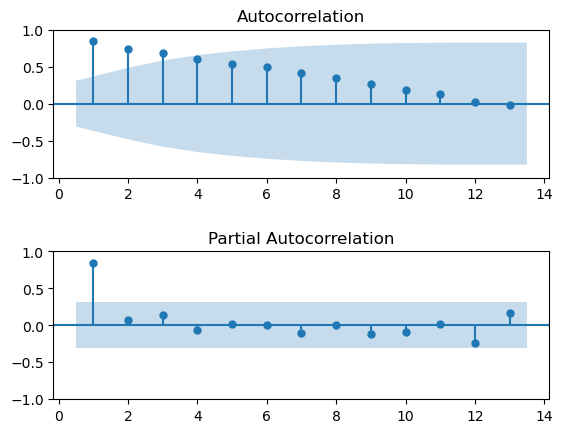

In [3]:
mf.single_ts_plot(data['X'])
mf.shapiroqq(data['X'])
mf.runs(data['X'])
mf.acfpacf(data['X'])


In [4]:

import statsmodels.api as sm
import qda
x = data['Week'] #se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data['X']
model = sm.OLS(y, x).fit()
qda.summary(model)


REGRESSION EQUATION
-------------------
X =  + 3.209 const + 0.011 Week

COEFFICIENTS
------------
 Term   Coef  SE Coef  T-Value    P-Value
const 3.2086   0.0190 168.5545 3.1491e-56
 Week 0.0106   0.0008  13.0930 1.1657e-15

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0591 0.8186     0.8138

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS    F-Value    P-Value
Regression  1.0  0.5982  0.5982   171.4264 1.1657e-15
     const  1.0 99.1367 99.1367 28410.6261 3.1491e-56
      Week  1.0  0.5982  0.5982   171.4264 1.1657e-15
     Error 38.0  0.1326  0.0035        NaN        NaN
     Total 39.0  0.7308     NaN        NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.767
Runs test statistic = -2.563
Runs test p-value = 0.010
Reject H0: the data are not random


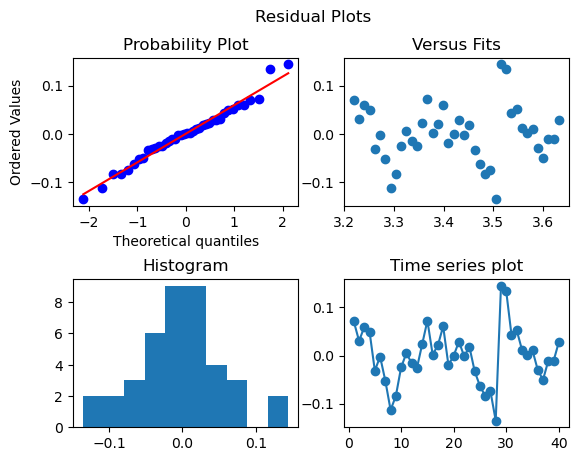

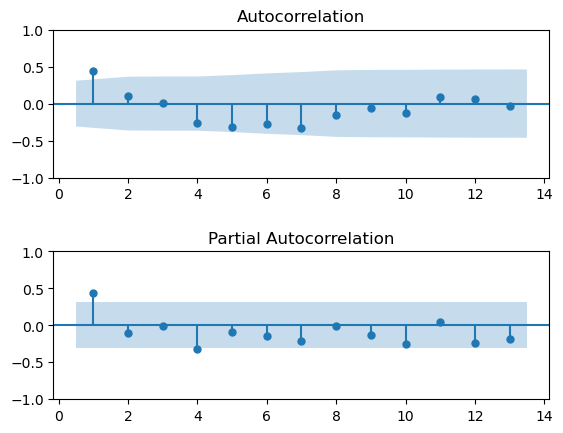

Test statistic rk = 0.435060
Rejection region at 0.309898, which is the value of z_alpha2/np.sqrt(n)
The null hypothesis is rejected


In [5]:

mf.shapirplusresplots(model)
mf.runs(model.resid)
mf.acfpacf(model.resid)
mf.bartlett_test(model.resid,1)

In [6]:

data['lag1']=data['X'].shift(1)
x = data[['Week','lag1']].iloc[1:,:] #se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data['X'].iloc[1:]
model = sm.OLS(y, x).fit()
qda.summary(model)

#una mossa sarebbe potuta essere la stepwise (al posto di fittare un modello e poi un altro ancora cosi come ho fatto)

REGRESSION EQUATION
-------------------
X =  + 1.797 const + 0.006 Week + 0.439 lag1

COEFFICIENTS
------------
 Term   Coef  SE Coef  T-Value  P-Value
const 1.7971   0.4689   3.8330   0.0005
 Week 0.0063   0.0017   3.6718   0.0008
 lag1 0.4387   0.1464   2.9959   0.0049

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0531 0.8571     0.8492

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  2.0  0.6102  0.3051 108.0056 6.1361e-16
     const  1.0  0.0415  0.0415  14.6921 4.8930e-04
      Week  1.0  0.0381  0.0381  13.4824 7.7599e-04
      lag1  1.0  0.0254  0.0254   8.9756 4.9292e-03
     Error 36.0  0.1017  0.0028      NaN        NaN
     Total 38.0  0.7119     NaN      NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.003
Runs test statistic = 0.816
Runs test p-value = 0.414
Accept H0: the data are random


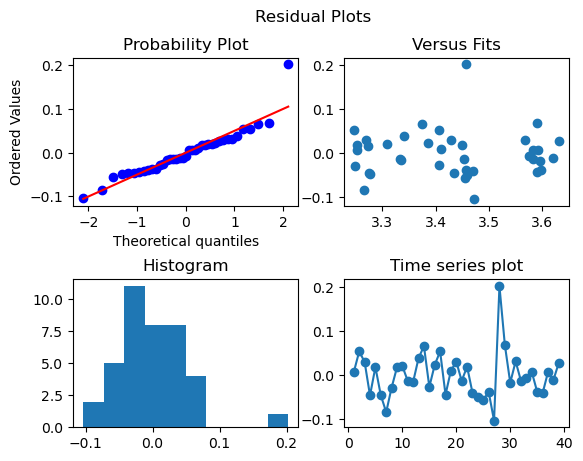

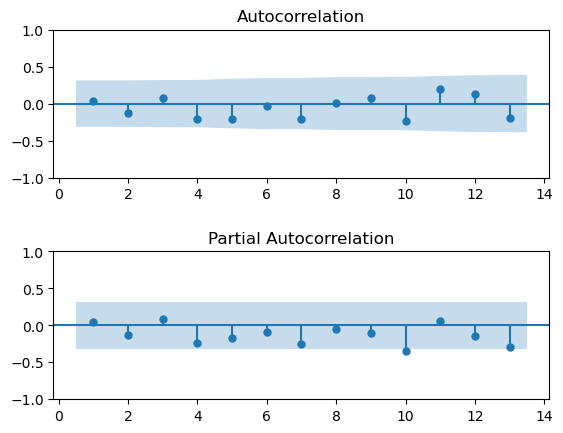

Test statistic rk = 0.041324
Rejection region at 0.313845, which is the value of z_alpha2/np.sqrt(n)
The null hypothesis is accepted


In [7]:
mf.shapirplusresplots(model)
mf.runs(model.resid)
mf.acfpacf(model.resid)
mf.bartlett_test(model.resid,1)

sembra tutto quanto meno decente tranne per quei dannati residui che sono diventati non normali...


Number of points n = 39
Mean = -0.00


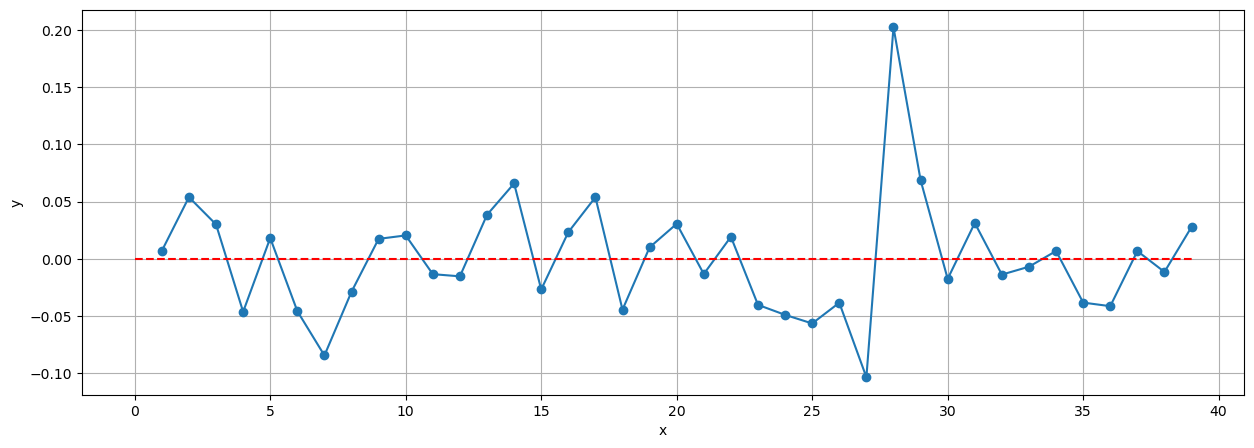

In [8]:
mf.single_ts_plot(model.resid)


dalla time series plot dei residui si vede bene come ci sia un residuo molto grande rispetto agli altri. questo ci può far pensare che il dato che genera quel residuo sia un outlier e che generebbe un OOC nel nostro SCC successivamente! 
In casi simili quindi, in cui ci tutto va bene, ma la normalità fallisce, è bene verificare la presenza di outlier come appena detto e poi si hanno due strade:
1)fare lo SCC senza tanto pensarci, vedere l'outlier (o OOC), usare dummy approach, SE si assume che ci sia una assignable cause rimodellizzare con la dummy, shapiro sui residui, rifare SCC 
2)rimuovere outlier, fare shapiro con un residuo in meno, fare SCC su tutto, vedere che outlier=OOC, rifare modellizzazzione ad esempio con dummy approach se si assume che ci sia assignable cause

In [9]:
model.resid[28]=np.nan

p-value of the Shapiro-Wilk test: 0.675


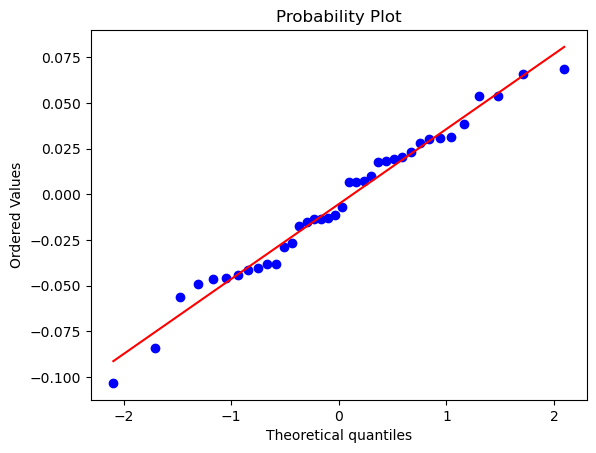

Accept H0: the data are normal


In [10]:
mf.shapiroqq(model.resid)
#torna la normalità così! bastava rimuovere quell'outlier

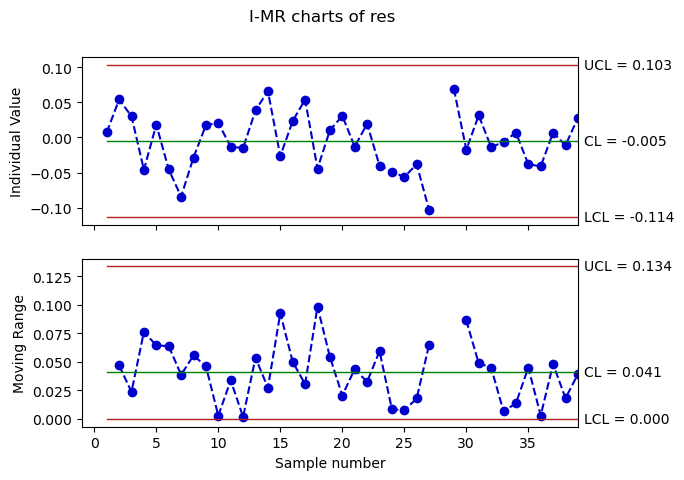

In [11]:

df_SCC = pd.DataFrame({'res': model.resid}) #lo chiamo direttamente df_SCC
df_SCC = qda.ControlCharts.IMR(df_SCC, 'res')

#vediamo l'OOC


An additional information is that on the 29th week, the company uploaded a special video on 
Facebook to celebrate its second anniversary. Was this video upload successful? Only for that 
day or even in the following ones? How does the control chart design change if this additional 
information is included? Discuss the results. 

In [12]:
#rimodellizzo visto che è come dire che c'è un assingnable cause a quell'outlier
data['lag1']=data['X'].shift(1)
data['dummy_OOC']=np.zeros(len(data))
data['dummy_OOC'].iloc[28]=1 #29esima week
x = data[['Week','lag1','dummy_OOC']].iloc[1:,:] #se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data['X'].iloc[1:]
model1 = sm.OLS(y, x).fit()
qda.summary(model1)

REGRESSION EQUATION
-------------------
X =  + 1.004 const + 0.003 Week + 0.687 lag1 + 0.245 dummy_OOC

COEFFICIENTS
------------
     Term   Coef  SE Coef  T-Value    P-Value
    const 1.0044   0.3671   2.7357 9.7072e-03
     Week 0.0033   0.0013   2.4368 2.0044e-02
     lag1 0.6871   0.1147   5.9898 7.9629e-07
dummy_OOC 0.2450   0.0425   5.7689 1.5568e-06

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0386 0.9268     0.9205

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  3.0  0.6598  0.2199 147.6621 6.2942e-20
     const  1.0  0.0111  0.0111   7.4842 9.7072e-03
      Week  1.0  0.0088  0.0088   5.9379 2.0044e-02
      lag1  1.0  0.0534  0.0534  35.8780 7.9629e-07
 dummy_OOC  1.0  0.0496  0.0496  33.2807 1.5568e-06
     Error 35.0  0.0521  0.0015      NaN        NaN
     Total 38.0  0.7119     NaN      NaN        NaN


c:\Users\alyuk\anaconda3\envs\qda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Shapiro-Wilk test p-value on the residuals = 0.288
Runs test statistic = 0.527
Runs test p-value = 0.598
Accept H0: the data are random


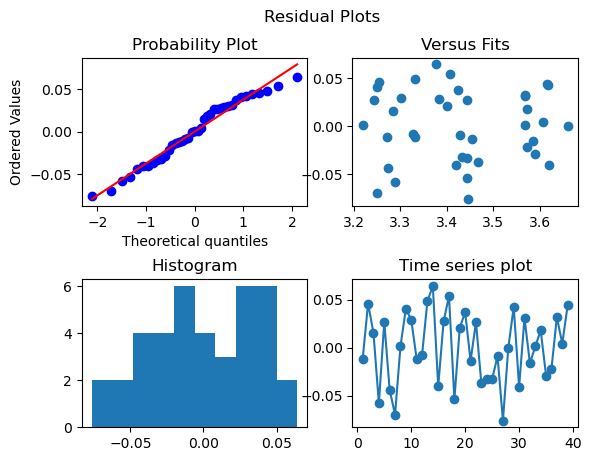

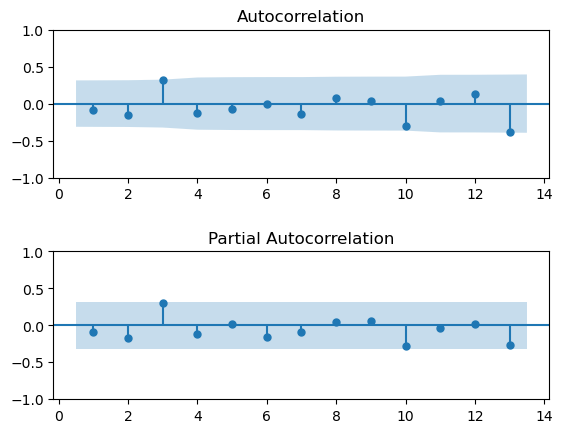

Test statistic rk = -0.087332
Rejection region at 0.313845, which is the value of z_alpha2/np.sqrt(n)
The null hypothesis is accepted


In [13]:
mf.shapirplusresplots(model1)
mf.runs(model1.resid)
mf.acfpacf(model1.resid)
mf.bartlett_test(model1.resid,1)

#normalità viene accettata!!!

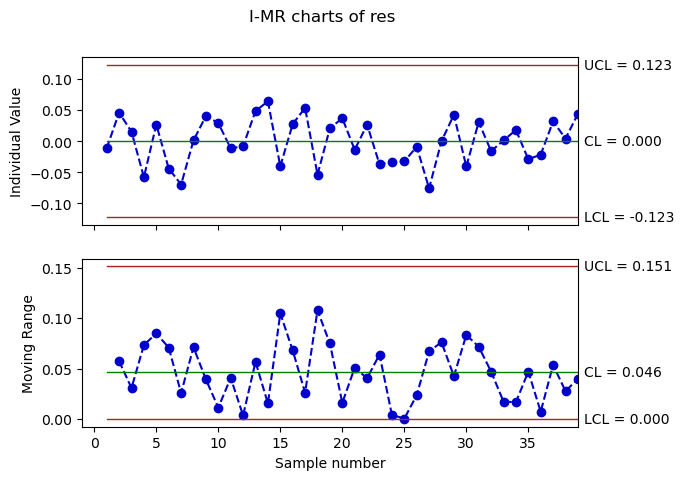

In [14]:
#assumendo che ci sia una assignable cause:
df_SCC = pd.DataFrame({'res': model1.resid}) #lo chiamo direttamente df_SCC
df_SCC = qda.ControlCharts.IMR(df_SCC, 'res')


in realtà però il testo ci diceva se quell'evento fosse stato significativo anche successivamente!
il modo migliore di farlo era fare due stepwise regression dove si testa uno in cui c'è la dummy=1 solo per l'OOC e uno dove c'è la dummy pari a 1 da lì in poi!

In [15]:
#secondo modello da provare
data['dummy2_OOC']=np.zeros(len(data))
data['dummy2_OOC'].iloc[28:]=1 #da 29esima week
x = data[['Week','lag1','dummy2_OOC']].iloc[1:,:] #se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data['X'].iloc[1:]
model2 = sm.OLS(y, x).fit()
qda.summary(model2)

#in questo caso viene ad esempio che il p_value per il t-test sul beta del lag1 dà 0.026
#è importante notare che si stanno conducendo ben 4 t-test in un colpo solo
alpha_overall=0.1
alpha_bonferroni=alpha_overall/4

#alpha singolo quindi sarebbe 0.025 e p_value su lag1 dà 0.026 quindi tecnicamente dovrebbe levarlo come regressore!
#proviamo a rimuoverlo!

REGRESSION EQUATION
-------------------
X =  + 2.181 const + 0.005 Week + 0.328 lag1 + 0.079 dummy2_OOC

COEFFICIENTS
------------
      Term   Coef  SE Coef  T-Value    P-Value
     const 2.1810   0.4576   4.7660 3.2464e-05
      Week 0.0049   0.0017   2.9050 6.3259e-03
      lag1 0.3281   0.1418   2.3130 2.6722e-02
dummy2_OOC 0.0788   0.0297   2.6472 1.2085e-02

MODEL SUMMARY
-------------
     S  R-sq  R-sq(adj)
0.0492 0.881     0.8708

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  3.0  0.6271  0.2090  86.3555 3.0239e-16
     const  1.0  0.0550  0.0550  22.7146 3.2464e-05
      Week  1.0  0.0204  0.0204   8.4390 6.3259e-03
      lag1  1.0  0.0130  0.0130   5.3499 2.6722e-02
dummy2_OOC  1.0  0.0170  0.0170   7.0076 1.2085e-02
     Error 35.0  0.0847  0.0024      NaN        NaN
     Total 38.0  0.7119     NaN      NaN        NaN


c:\Users\alyuk\anaconda3\envs\qda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
data['lag1']=data['X'].shift(1)
data['dummy2_OOC']=np.zeros(len(data))
data['dummy2_OOC'].iloc[28:]=1 #da 29esima week
x = data[['Week','dummy2_OOC']].iloc[1:,:] #se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data['X'].iloc[1:]
model2_b = sm.OLS(y, x).fit()
qda.summary(model2_b)
#tutto è significativo ma andando poi a checckare le assumptions...

REGRESSION EQUATION
-------------------
X =  + 3.238 const + 0.008 Week + 0.099 dummy2_OOC

COEFFICIENTS
------------
      Term   Coef  SE Coef  T-Value    P-Value
     const 3.2385   0.0211 153.8162 2.4579e-52
      Week 0.0076   0.0012   6.1844 3.9434e-07
dummy2_OOC 0.0990   0.0301   3.2899 2.2476e-03

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0521 0.8628     0.8552

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS    F-Value    P-Value
Regression  2.0  0.6142  0.3071   113.1823 2.9727e-16
     const  1.0 64.1954 64.1954 23659.4351 2.4579e-52
      Week  1.0  0.1038  0.1038    38.2468 3.9434e-07
dummy2_OOC  1.0  0.0294  0.0294    10.8234 2.2476e-03
     Error 36.0  0.0977  0.0027        NaN        NaN
     Total 38.0  0.7119     NaN        NaN        NaN


c:\Users\alyuk\anaconda3\envs\qda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Shapiro-Wilk test p-value on the residuals = 0.873
Runs test statistic = -3.731
Runs test p-value = 0.000
Reject H0: the data are not random


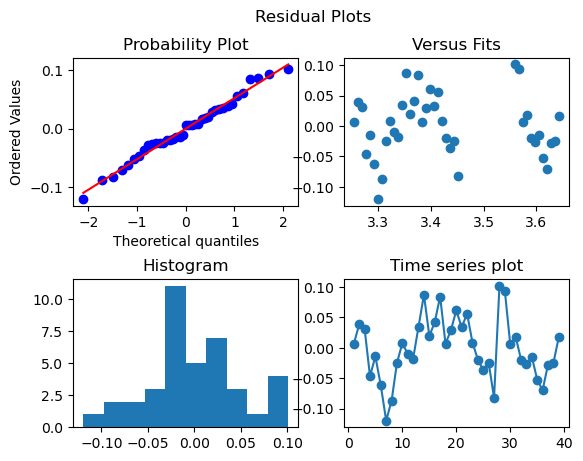

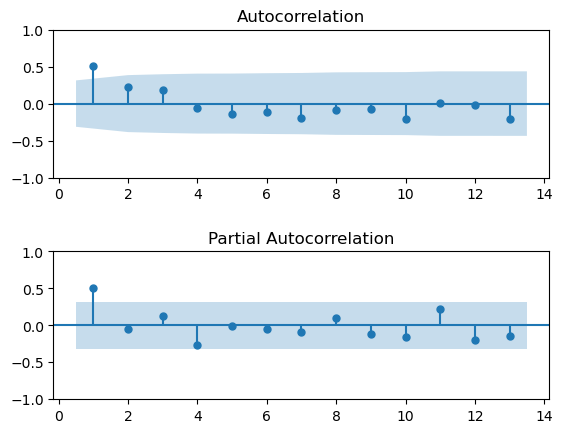

Test statistic rk = 0.503850
Rejection region at 0.313845, which is the value of z_alpha2/np.sqrt(n)
The null hypothesis is rejected


In [17]:
#check delle assumptions per il modello che tiene in considerazione il periodo post caricamento video
mf.shapirplusresplots(model2_b)
mf.runs(model2_b.resid)
mf.acfpacf(model2_b.resid)
mf.bartlett_test(model2_b.resid,1)
#fallisce la randomness sia nel runs test, sia nel bartlett test per il lag1 che conferma!
#

in pratica se al modello che tiene conto del periodo levi lag1 come regressore falliscono le assumptions, se lo tieni invece (anche se borderline) andrebbe rimosso lag(1) come regressore.
si entra in un loop di menate insomma.

Il primo modello che invece teneva conto solo di quel giorno e tiene lag(1) non ha questi problemi e in più dalla time series dei residui si vede che sono decisamente meglio della versione senza lag(1) che tiene conto di tutto il periodo.

In pratica possiamo dire che è stato un successo il video perchè il modello1 è significativo, ma affermare che ha aiutato anche dopo è più tricky!
Ci teniamo il modello1 per cui già avevamo fatto uno SCC (dove tutto era IC perchè modellizzato l'OOC) :)

3)Using the model estimated at point b), design an interval prediction for the popularity index 
to be expected next week. 

In [26]:
#x = data[['Week','lag1','dummy_OOC']].

last_lag = data['X'].iloc[-1] 
next_week=int(data['Week'].iloc[-1])+1
next_dummy=0
prediction_df = model1.get_prediction([1,next_week,last_lag,next_dummy]).summary_frame(alpha=0.05)
qda.summary(model1)
print('')
print('prediction interval ecc:')
print(prediction_df)


REGRESSION EQUATION
-------------------
X =  + 1.004 const + 0.003 Week + 0.687 lag1 + 0.245 dummy_OOC

COEFFICIENTS
------------
     Term   Coef  SE Coef  T-Value    P-Value
    const 1.0044   0.3671   2.7357 9.7072e-03
     Week 0.0033   0.0013   2.4368 2.0044e-02
     lag1 0.6871   0.1147   5.9898 7.9629e-07
dummy_OOC 0.2450   0.0425   5.7689 1.5568e-06

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0386 0.9268     0.9205

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  3.0  0.6598  0.2199 147.6621 6.2942e-20
     const  1.0  0.0111  0.0111   7.4842 9.7072e-03
      Week  1.0  0.0088  0.0088   5.9379 2.0044e-02
      lag1  1.0  0.0534  0.0534  35.8780 7.9629e-07
 dummy_OOC  1.0  0.0496  0.0496  33.2807 1.5568e-06
     Error 35.0  0.0521  0.0015      NaN        NaN
     Total 38.0  0.7119     NaN      NaN        NaN

prediction interval ecc:
     mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_uppe